# From raw CSV to CSV process

In [18]:
import re
import os
import pandas as pd

In [19]:
path_2 = r"C:\Users\Guilhem Leprince\repo"
path = r"C:\Users\guilhem.leprince\Documents\strava"
directory = path + r"\data\gab\activities"
output_csv = path + r"\data\processed_data\gab\csv\\"

In [20]:
CSV_FILE = re.compile("\\d+.csv")

list_of_raw_csv_files = []


for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and CSV_FILE.match(filename):
        list_of_raw_csv_files.append(f)

print("A total of " + str(len(list_of_raw_csv_files)) + " csv files found")


A total of 279 csv files found


In [21]:
for csv_file in list_of_raw_csv_files:
    filename = csv_file.split("\\")[-1]
    print("Processing " + filename)
    raw_data=pd.read_csv(csv_file)
    raw_data["is_record"]= raw_data.Message=="record"
    raw_data["is_latlon"]= raw_data["Field 3"]=="position_long"
    raw_data_12 = raw_data[raw_data.is_record & raw_data.is_latlon][["Local Number",
                                                      "Value 1","Value 2","Value 3","Value 4","Value 5","Value 6",
                                                      "Value 7","Value 8","Value 9","Value 10","Value 11","Value 12"]]
    raw_data_12=raw_data_12.rename(columns={"Local Number":"datatype", "Value 1": "time", "Value 2": "lat","Value 3": "lon",
                                        "Value 4": "dist", "Value 5": "alti", "Value 6": "spd", "Value 7": "quid",
                                        "Value 8" :"bpm", "Value 9": "cad", "Value 10": "fraq", "Value 11": "alti_corr",
                                        "Value 12": "spd_corr"})
    raw_data_14 = raw_data[raw_data["Local Number"]==14][["Local Number",
                                                      "Value 1","Value 2","Value 3","Value 4","Value 5","Value 6",
                                                      "Value 7","Value 8"]]
    raw_data_14 = raw_data_14.rename(columns={"Local Number":"datatype", "Value 1": "time", "Value 2": "dist","Value 3": "alt",
                                        "Value 4": "quid", "Value 5": "bpm", "Value 6": "cad", "Value 7": "frac",
                                        "Value 8" :"alti_corr"})
    raw_data_14["lat"]=""
    raw_data_14["lon"]=""
    raw_data_14["spd"]=""
    raw_data_14["spd_corr"]=""
    df=raw_data_12.append(raw_data_14)
    df = df.set_index("time")
    df["lat"] = df.lat.apply(convert_coordinate)
    df["lon"] = df.lon.apply(convert_coordinate)
    df.to_csv(output_csv + filename)

Processing 2362511257.csv
Processing 2616598250.csv
Processing 2623093060.csv
Processing 2623093544.csv
Processing 2623093769.csv
Processing 2636543769.csv
Processing 2636732398.csv
Processing 3273963261.csv
Processing 3273964321.csv
Processing 3776800151.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,22,40,47,83,86,89,104,107,231,234,237,240,243,246) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,22,40,47,83,86,89,104,107,231,234,237,240,243,246) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 3786869228.csv
Processing 3810459266.csv
Processing 3813529714.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,7,16,22,23,26,40,45,47,48,50,51,53,54,56,57,59,60,62,63,66,69,71,72,74,75,77,78,80,81,83,84,86,87,89,90,92,93,95,96,98,99,101,102,104,105,107,108,111,114,117,120,123,126,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 3860288016.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,22,23,39,40,42,45,47,48,50,51,53,54,56,57,59,60,62,63,66,69,71,72,74,75,78,80,81,83,84,86,87,89,90,92,93,95,96,98,99,102,105,108,111,114,117,120,123,126,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 4777737896.csv
Processing 4850653013.csv
Processing 4854615033.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,22,40,47,83,86,89,104,107,231,234,237,240,243,246) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,47,83,86,89,104,107,110,113,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 4860060575.csv
Processing 4873354693.csv
Processing 4900590631.csv
Processing 4912778213.csv
Processing 4941706916.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,7,10,16,22,40,47,50,56,59,62,71,74,77,80,83,86,89,92,95,98,101,104,107,110,113,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,47,83,86,89,104,107,110,113,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 4945073030.csv
Processing 4962867565.csv
Processing 4967165411.csv
Processing 4977939800.csv
Processing 4989209048.csv
Processing 4989212212.csv
Processing 4989212861.csv
Processing 4992300315.csv
Processing 4999846959.csv
Processing 5007744394.csv
Processing 5030246146.csv
Processing 5042215621.csv
Processing 5063890368.csv
Processing 5063890762.csv
Processing 5071180071.csv
Processing 5087771005.csv
Processing 5105216212.csv
Processing 5105217267.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,47,83,86,89,104,107,110,113,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,7,10,16,22,40,47,50,56,59,62,71,74,77,80,83,86,89,92,95,98,101,104,107,110,113,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 5107505150.csv
Processing 5109724868.csv
Processing 5118986679.csv
Processing 5124488533.csv
Processing 5139653381.csv
Processing 5139655842.csv
Processing 5154670515.csv
Processing 5154675817.csv
Processing 5166950720.csv
Processing 5184907546.csv
Processing 5191802080.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,7,10,16,22,40,47,50,56,59,62,71,74,77,80,83,86,89,92,95,98,101,104,107,110,113,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,7,10,16,22,40,47,50,56,59,62,71,74,77,80,83,86,89,92,95,98,101,104,107,110,113,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 5191802564.csv
Processing 5211421498.csv
Processing 5235753328.csv
Processing 5252319875.csv
Processing 5275993430.csv
Processing 5294256350.csv
Processing 5313771013.csv
Processing 5333674660.csv
Processing 5334381235.csv
Processing 5359869004.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,7,10,16,22,40,47,50,56,59,62,71,74,77,80,83,86,89,92,95,98,101,104,107,110,113,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,47,83,86,89,104,107,110,113,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 5376601813.csv
Processing 5391285548.csv
Processing 5404357528.csv
Processing 5404363495.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,7,10,16,22,26,29,40,45,47,48,50,51,53,54,56,57,59,60,62,63,66,69,71,72,74,75,77,78,80,81,83,84,86,87,89,90,92,93,95,96,98,99,101,102,104,105,107,108,110,111,113,114,117,120,123,126,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 5409849745.csv
Processing 5414737296.csv
Processing 5425443794.csv
Processing 5426495242.csv
Processing 5433194148.csv
Processing 5446971776.csv
Processing 5465387383.csv
Processing 5479985207.csv
Processing 5518814984.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,41,47,83,98,101,104,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,41,47,50,56,59,62,71,74,83,86,89,92,95,98,101,104,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 5518826221.csv
Processing 5522816648.csv
Processing 5532929309.csv
Processing 5574423793.csv
Processing 5590855540.csv
Processing 5606870554.csv
Processing 5613749453.csv
Processing 5613750248.csv
Processing 5635758615.csv
Processing 5635763856.csv
Processing 5639784077.csv
Processing 5645997424.csv
Processing 5649646597.csv
Processing 5653176119.csv
Processing 5699861294.csv
Processing 5699862454.csv
Processing 5716725907.csv
Processing 5730648091.csv
Processing 5734039131.csv
Processing 5752117915.csv
Processing 5762334537.csv
Processing 5784590653.csv
Processing 5794678943.csv
Processing 5807210577.csv
Processing 5810633141.csv
Processing 5827599576.csv
Processing 5835461305.csv
Processing 5835468124.csv
Processing 5853349458.csv
Processing 5853350083.csv
Processing 5853351661.csv
Processing 5891271933.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,41,47,83,98,101,104,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,41,47,83,98,101,104,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 5893934300.csv
Processing 5949326914.csv
Processing 5967592896.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,41,47,83,98,101,104,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,47,83,86,89,102,104,105,107,108,110,111,113,114,117,120,123,126,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6009544903.csv
Processing 6009547686.csv
Processing 6026116344.csv
Processing 6043065549.csv
Processing 6054677948.csv
Processing 6064770480.csv
Processing 6092115609.csv
Processing 6124374712.csv
Processing 6124389177.csv
Processing 6125541956.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,47,83,86,89,102,104,105,107,108,110,111,113,114,117,120,123,126,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6142520975.csv
Processing 6142523895.csv
Processing 6155293708.csv
Processing 6157666689.csv
Processing 6166009486.csv
Processing 6199662144.csv
Processing 6276994952.csv
Processing 6366361941.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,10,22,40,41,47,83,96,98,99,101,102,104,105,108,111,114,117,120,123,126,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6454629235.csv
Processing 6464953261.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6470389136.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6501076598.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6514218227.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6546908996.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6546917855.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6578602814.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6605158758.csv
Processing 6615438641.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312)

Processing 6645248204.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,87,90,93,94,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,129,132,135,136,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6664504116.csv
Processing 6681118401.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await sel

Processing 6681123126.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6682419781.csv
Processing 6698345595.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_

Processing 6729609405.csv
Processing 6735914237.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,

Processing 6755918077.csv
Processing 6764451390.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,

Processing 6772694863.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6776327978.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6797583269.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6807469203.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6835538524.csv
Processing 6836294307.csv
Processing 6838938320.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interact

Processing 6843867405.csv
Processing 6848083289.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,2

Processing 6848295805.csv
Processing 6850810029.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,

Processing 6860529326.csv
Processing 6867739148.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6871346267.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6877939016.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6890046426.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6892140253.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6903476295.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6925744248.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6949094780.csv
Processing 6964815044.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6979257427.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 6986460021.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7013045375.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7020156851.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7023767464.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7041724596.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7054992441.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7062248208.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7078442963.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7084574064.csv
Processing 7098702306.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await 

Processing 7101615979.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7136121606.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7139075410.csv
Processing 7160731613.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7176925880.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7187467824.csv
Processing 7193788436.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await 

Processing 7213260450.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7213270040.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7234679669.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7236059420.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7244801493.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7246118832.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7253202754.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7253212399.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7287130677.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7290380842.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7313906763.csv
Processing 7326879124.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,65,68,71,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await sel

Processing 7349673256.csv
Processing 7364301316.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await 

Processing 7370435075.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7374469719.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,110,113,119,122,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.ru

Processing 7380605009.csv
Processing 7386986011.csv
Processing 7401428624.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (37,44,77,80,89,92,231,234,237,240,243,246) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7407871542.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7430063945.csv
Processing 7437703422.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await sel

Processing 7441884490.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7448560929.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,46,47,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7452783334.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7471958569.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7526161104.csv
Processing 7545488871.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7566851396.csv
Processing 7579234555.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,43,62,65,91,104,107,115,125,128,142,243,246,249,252,255,258,261,264,267,270,273,276,279) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_as

Processing 7601565238.csv
Processing 7616500299.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (32,35,43,50,62,65,85,92,93,95,96,99,101,102,104,105,108,111,114,117,120,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7625459573.csv
Processing 7637966353.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_

Processing 7663348864.csv
Processing 7675594038.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_

Processing 7680591634.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7686332313.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7690642910.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await 

Processing 7718630378.csv
Processing 7721547954.csv
Processing 7725515883.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (32,35,43,50,62,65,85,92,93,95,96,99,101,102,104,105,108,111,114,117,120,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7735653751.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7742215222.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7765670478.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7807593718.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7820938828.csv
Processing 7850165211.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7850174379.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7864641817.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7864652667.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7879240075.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7889601164.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7894270118.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (4,5,7,8,11,14,16,17,20,23,24,26,27,29,30,32,33,35,36,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,11

Processing 7925520288.csv
Processing 7932331314.csv
Processing 7939097024.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (32,35,43,50,62,65,85,92,93,95,96,99,101,102,104,105,108,111,114,117,120,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7939097277.csv
Processing 7960357565.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7962013645.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7966890023.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7972458823.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7978030275.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 7985326742.csv
Processing 7990518530.csv
Processing 8008900291.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await sel

Processing 8012138725.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8039725194.csv
Processing 8056460244.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225

Processing 8057544335.csv
Processing 8063381566.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,2

Processing 8067624806.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8092611695.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8099929761.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8105125179.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,13,16,23,37,38,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,71,72,75,77,78,80,81,83,84,86,87,90,93,96,98,99,101,102,103,104,105,107,108,110,111,113,114,116,117,120,122,123,125,126,129,131,132,134,135,138,139,141,144,147,150,152,153,155,156,159,162,165,166,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,265,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312,315,318,321,324,327,330,333,336,339,342,345,348) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8142146441.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,45,46,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,71,72,74,75,77,78,80,81,84,87,90,91,92,93,95,96,98,99,101,102,104,105,107,108,110,111,113,114,116,117,120,122,123,125,126,129,130,132,135,138,140,141,142,143,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8143140250.csv
Processing 8151820010.csv
Processing 8154587527.csv
Processing 8161076010.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8165178265.csv
Processing 8177630492.csv
Processing 8186991828.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8218536848.csv
Processing 8242818063.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8280696615.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,38,39,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8284024635.csv
Processing 8315509214.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8321616915.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (38,46,53,65,68,85,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8359198766.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,16,23,26,42,45,46,47,48,50,51,53,54,56,57,59,60,62,63,65,66,68,69,72,74,75,77,78,80,81,83,84,85,87,90,93,95,96,98,99,101,102,104,105,108,110,111,113,114,117,119,120,122,123,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Processing 8366182505.csv
Processing 8371556426.csv
Processing 8392493141.csv


C:\Users\guilhem.leprince\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (46,53,65,68,85,110,113,119,122,127,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Usefull

In [13]:
def convert_coordinate(value):
    toReturn = ""
    if value:
        try:
            value = float(value)
            if value and value!=0:
                toReturn = value/((2**32)/360)
        except(ValueError):
            pass
    return toReturn

# misc

In [1]:

import folium
import matplotlib.pyplot as plt
import subprocess
import math

In [2]:
FILE_PATH = "data_example/raw_csv/"
OUTPUT = "data_example/csv/"
FILENAME = "8279264048.csv"

In [3]:
raw_data=pd.read_csv(FILE_PATH + FILENAME)

In [5]:
raw_data.drop(raw_data[raw_data.Type=="Definition"].index).head(30)

,Type,Local Number,Message,Field 1,Value 1,Units 1,Field 2,Value 2,Units 2,Field 3,...,Field 42,Value 42,Units 42,Field 43,Value 43,Units 43,Field 44,Value 44,Units 44,Unnamed: 135
1,Data,0,file_id,serial_number,3978501192,NaN,time_created,1031213441,NaN,manufacturer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data,1,file_creator,software_version,820,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data,2,event,timestamp,1031213441,s,timer_trigger,0,NaN,event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data,3,device_info,timestamp,1031213441,s,serial_number,3978501192,NaN,manufacturer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Data,3,device_info,timestamp,1031213441,s,manufacturer,1,NaN,garmin_product,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Data,3,device_info,timestamp,1031213441,s,manufacturer,54433,NaN,product,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Data,3,device_info,timestamp,1031213441,s,software_version,2.21,NaN,device_index,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Data,4,unknown,unknown,1031213441,NaN,unknown,1,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Data,5,unknown,unknown,1031213441,NaN,unknown,1029931184,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Data,6,device_settings,utc_offset,0,NaN,time_offset,7200,s,autosync_min_steps,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_data["is_record"]= raw_data.Message=="record"
raw_data["is_latlon"]= raw_data["Field 3"]=="position_long"


In [7]:
raw_data[raw_data.is_record & raw_data.is_latlon].head(20)

,Type,Local Number,Message,Field 1,Value 1,Units 1,Field 2,Value 2,Units 2,Field 3,...,Units 42,Field 43,Value 43,Units 43,Field 44,Value 44,Units 44,Unnamed: 135,is_record,is_latlon
27,Definition,12,record,timestamp,1,NaN,position_lat,1,NaN,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
28,Data,12,record,timestamp,1031213441,s,position_lat,510009083,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
29,Data,12,record,timestamp,1031213442,s,position_lat,510009020,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
30,Data,12,record,timestamp,1031213447,s,position_lat,510008603,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
31,Data,12,record,timestamp,1031213451,s,position_lat,510008276,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
32,Data,12,record,timestamp,1031213456,s,position_lat,510007714,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
33,Data,12,record,timestamp,1031213460,s,position_lat,510007488,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
34,Data,12,record,timestamp,1031213477,s,position_lat,510007424,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
35,Data,12,record,timestamp,1031213481,s,position_lat,510007302,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
36,Data,12,record,timestamp,1031213486,s,position_lat,510007290,semicircles,position_long,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True


Text(0, 0.5, 'altitude')

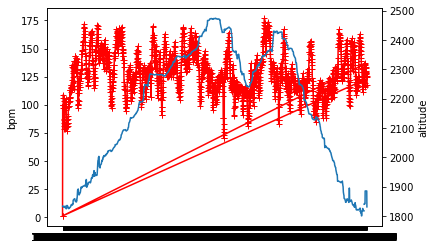

In [52]:
df["bpm"]=df["bpm"].astype(float)

fig, ax = plt.subplots()
ax.plot(df["bpm"], color= "red", marker="+")
ax.set_ylabel('bpm')
ax2 = ax.twinx()
ax2.plot(df["alti_corr"])
ax2.set_ylabel("altitude")

In [194]:
map = folium.Map(location=coor[1])
folium.PolyLine(locations=coor).add_to( map )
map.save("test.html")